In [4]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [5]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [6]:
import matplotlib.pyplot as plt

### 이미지 확인
- 이미지 및 원본 크기

In [133]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissors"

In [134]:
images=glob.glob(image_dir_path + "/*.jpg")

In [135]:
print("scissors:",len(images))

scissors: 1117


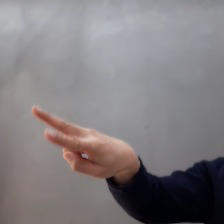

In [129]:
im=Image.open(images[165])
im

In [136]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rocks"
images=glob.glob(image_dir_path + "/*.jpg")
print("rocks:",len(images))

rocks: 1279


In [137]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/papers"
images=glob.glob(image_dir_path + "/*.jpg")
print("papers:",len(images))

papers: 1319


In [123]:
print(im.size)

(224, 224)


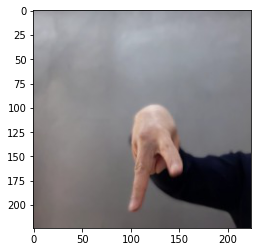

In [124]:
import matplotlib.image as mpimg

image_data = mpimg.imread(images[3])

# 이미지를 시각화합니다.
plt.imshow(image_data)
plt.show()

### image resize

In [7]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 64x64 사이즈로 바꾸어 저장합니다.
	target_size=(64,64)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1117  images to be resized.
1117  images resized.
가위 이미지 resize 완료!


In [8]:
# 바위
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rocks"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1279  images to be resized.
1279  images resized.
바위 이미지 resize 완료!


In [9]:
# 보
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/papers"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1319  images to be resized.
1319  images resized.
보 이미지 resize 완료!


In [24]:
im=Image.open(images[0])
im

### load_data

In [138]:
1117+ 1279+ 1319

3715

In [11]:
import numpy as np

def load_data(img_path, number_of_data=3715):
    # scissor : 0, rock : 1, paper : 2
    img_size = 64
    color = 3
    # create matrix areas to store image data & label(scissor : 0, rock : 1, paper : 2)
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # copy image matrix to data area
        labels[idx] = 0 # scissor : 0
        idx = idx+1
    
    for file in glob.iglob(img_path+'/rocks/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # copy image matrix to data area
        labels[idx] = 1 # rock : 1
        idx = idx+1
        
    for file in glob.iglob(img_path+'/papers/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # copy image matrix to data area
        labels[idx] = 1 # paper 2
        idx = idx+1
    
    print("The number of images in the training dataset(x_train):", idx)
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train/255.0 # Normalize inputs to be btw 0 and 1

    
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

The number of images in the training dataset(x_train): 3715
x_train shape: (3715, 64, 64, 3)
y_train shape: (3715,)


label:  0


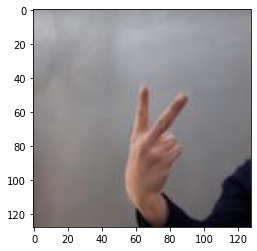

In [10]:
plt.imshow(x_train[100])
print('label: ', y_train[100])

## Designing a Deep Learning Network

In [96]:
from tensorflow import keras

n_channel_1 = 32
n_channel_2 = 64
n_dense = 32
n_train_epoch = 10

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(64, 64, 3)))
# model.add(keras.layers.Dropout(0.3)) # 드롭아웃 추가
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                401440    
_________________________________________________________________
dense_19 (Dense)             (None, 3)                

In [32]:
x_train.shape

(3715, 64, 64, 3)

In [33]:
y_train.shape

(3715,)

Epoch 1/10
117/117 [==============================] - 24s 199ms/step - loss: 2.6922 - accuracy: 0.8409 - val_loss: 1.0495 - val_accuracy: 0.6667
Epoch 2/10
117/117 [==============================] - 23s 198ms/step - loss: 0.0790 - accuracy: 0.9752 - val_loss: 1.0557 - val_accuracy: 0.6667
Epoch 3/10
117/117 [==============================] - 23s 197ms/step - loss: 0.0398 - accuracy: 0.9882 - val_loss: 1.0530 - val_accuracy: 0.6533
Epoch 4/10
117/117 [==============================] - 23s 198ms/step - loss: 0.0083 - accuracy: 0.9984 - val_loss: 1.0421 - val_accuracy: 0.6667
Epoch 5/10
117/117 [==============================] - 23s 198ms/step - loss: 0.0035 - accuracy: 0.9995 - val_loss: 1.0248 - val_accuracy: 0.6533
Epoch 6/10
117/117 [==============================] - 23s 199ms/step - loss: 4.2288e-04 - accuracy: 1.0000 - val_loss: 1.0227 - val_accuracy: 0.6533
Epoch 7/10
117/117 [==============================] - 23s 197ms/step - loss: 2.5220e-04 - accuracy: 1.0000 - val_loss: 1.0178 

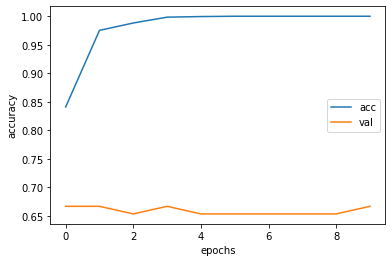

In [97]:
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# epochs=10
history = model.fit(x_train, y_train, validation_data=(x_test_norm, y_test), epochs=n_train_epoch)

# accuracy
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

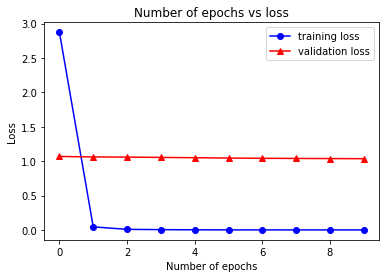

In [45]:
epochs = 10  # number of epochs
epochs_ = range(0, epochs)    
loss_train = history.history['loss']    ##getting  loss of each epochs
loss_val = history.history['val_loss']  ## getting validation loss of each epochs

plt.plot(epochs_, loss_train, label='training loss', color='blue', marker = 'o')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

plt.plot(epochs_, loss_val, label="validation loss", color='red', marker = '^')
plt.title('Number of epochs vs loss')
plt.legend()

## test

In [22]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [46]:
# test용 2조 데이터 
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/yu/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/yu/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/yu/paper"
resize_images(image_dir_path)

370  images to be resized.
370  images resized.
329  images to be resized.
329  images resized.
334  images to be resized.
334  images resized.


In [47]:
370+329+334

1033

In [79]:
# 3조
# test용 2조 데이터 
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/jh/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/jh/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/jh/paper"
resize_images(image_dir_path)

205  images to be resized.
205  images resized.
206  images to be resized.
206  images resized.
214  images to be resized.
214  images resized.


In [67]:
205+206+214

625

In [80]:
def load_data(img_path, number_of_data=625):
    # scissor : 0, rock : 1, paper : 2
    img_size = 64
    color = 3
    # create matrix areas to store image data & label(scissor : 0, rock : 1, paper : 2)
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # copy image matrix to data area
        labels[idx] = 0 # scissor : 0
        idx = idx+1
    
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # copy image matrix to data area
        labels[idx] = 1 # rock : 1
        idx = idx+1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # copy image matrix to data area
        labels[idx] = 1 # paper 2
        idx = idx+1
    
    print("The number of images in the test dataset(x_test):", idx)
    return imgs, labels

In [81]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/jh"
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test/255.0

The number of images in the test dataset(x_test): 625


In [72]:
print("x_test shape : {}".format(x_test.shape))
print("y_test shape : {}".format(y_test.shape))

x_test shape : (625, 64, 64, 3)
y_test shape : (625,)


In [75]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                102464    
_________________________________________________________________
dropout (Dropout)            (None, 64)               

In [82]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

20/20 - 1s - loss: 0.9026 - accuracy: 0.6880
test_loss: 0.9025686383247375
test_accuracy: 0.6880000233650208


### test

In [83]:
# 3조
# test용 2조 데이터 섞은것  
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/test/paper"
resize_images(image_dir_path)

25  images to be resized.
25  images resized.
25  images to be resized.
25  images resized.
25  images to be resized.
25  images resized.


In [85]:
def load_data(img_path, number_of_data=75):
    # scissor : 0, rock : 1, paper : 2
    img_size = 64
    color = 3
    # create matrix areas to store image data & label(scissor : 0, rock : 1, paper : 2)
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # copy image matrix to data area
        labels[idx] = 0 # scissor : 0
        idx = idx+1
    
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # copy image matrix to data area
        labels[idx] = 1 # rock : 1
        idx = idx+1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # copy image matrix to data area
        labels[idx] = 1 # paper 2
        idx = idx+1
    
    print("The number of images in the test dataset(x_test):", idx)
    return imgs, labels

In [86]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/test"
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test/255.0

The number of images in the test dataset(x_test): 75


In [87]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

3/3 - 0s - loss: 0.8455 - accuracy: 0.6933
test_loss: 0.8455148935317993
test_accuracy: 0.6933333277702332


label:  1


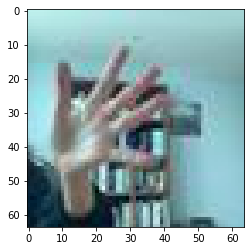

In [91]:
plt.imshow(x_test[74])
print('label: ', y_test[74])

In [54]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test) = load_data(image_dir_path)
# x_test_norm = x_test/255.0
# print("x_test shape : {}".format(x_test.shape))
# print("y_test shape : {}".format(y_test.shape))

The number of images in the training dataset(x_train): 300


label:  1


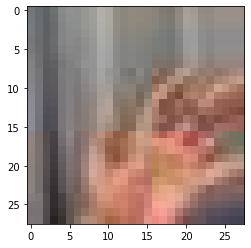

In [55]:
plt.imshow(x_test[200])
print('label: ', y_test[200])

In [58]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"

In [59]:
image_dir_path

'/aiffel/aiffel/rock_scissor_paper/test/scissor'

In [61]:
images=glob.glob(image_dir_path + "/*.jpg")
im=Image.open(images[2])
im

In [63]:
im=Image.open(images[40])
im

## predicted

In [92]:
# model이 입력값을 보고 실제로 추론한 확률분포 출력
# 즉 우리가 만든 model = 10개 숫자 중 어느 것일지에 대한 확률값 출력하는 함수
# 이 함수의 출력값, 즉 확률값이 가장 높은 숫자 = model이 추론한 숫자
predicted_result = model.predict(x_test_norm)  
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.4038776  0.41540924 0.18071316]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


예측확률분포: [0.4138958  0.51844454 0.06765965]
라벨: 0, 예측결과: 1


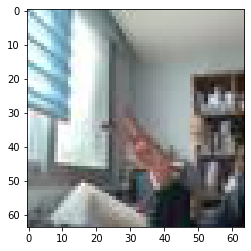

예측확률분포: [0.39370704 0.40432557 0.20196739]
라벨: 0, 예측결과: 1


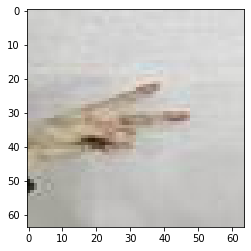

예측확률분포: [0.4113938  0.5236978  0.06490839]
라벨: 0, 예측결과: 1


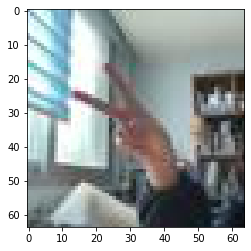

예측확률분포: [0.39131808 0.39964783 0.20903416]
라벨: 0, 예측결과: 1


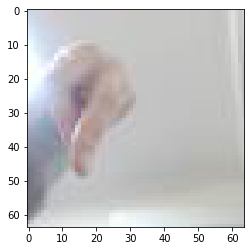

예측확률분포: [0.40063152 0.4107058  0.18866266]
라벨: 0, 예측결과: 1


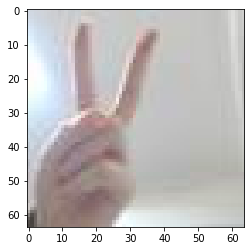

In [93]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

- 역시나 scissor 를 제일 많이 틀린다

In [59]:
from tensorflow import keras

n_channel_1 = 32
n_channel_2 = 64
n_dense = 64
dropout_rate = 0.5

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(dropout_rate))
model.add(keras.layers.Dense(3, activation='softmax')) # 3클래스 분류를 위한 설정

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                102464    
_________________________________________________________________
dropout (Dropout)            (None, 64)               

## 회고
- 역시나 가위를 제일 많이 틀린다! 이걸 어떻게 구분할 지 모르겠다!
    - 데이터셋 확장 : 가위 이미지가 더 다양한 각도와 배경에서 촬영된 데이터로 데이터셋을 확장,데이터 증강을 통해 기존 이미지를 변형시키는 방법
    - 특징 추출 개선: 모델의 컨볼루션 레이어를 조정하여 더 복잡한 특징을 추출. 더 많은 레이어를 추가하거나 필터의 크기와 수 조정
    
- 과적합 문제로 처음에 트레이닝 데이터로 인해 정확도가 1까지 올라가는 상황을 dropout으로 해결해보고자 했다
    - dropout 넣으니까 더 이상햄! 정규화기법도 이미 활용했는데 
- 앞으로 배울 딥러닝을 기반으로 실제 영상 인식을 통해 실시간으로 가위바위보 할 수 있는 프로그램을 만들어보고싶다
    - 실시간 처리 프레임워크: 실시간 영상 처리를 위해서는 OpenCV와 같은 라이브러리를 사용하여 카메라에서 입력되는 영상 데이터를 실시간으로 처리할 수 있다고 한다. TensorFlow와 OpenCV를 함께 사용하는 방법
    - 경량화 및 최적화: 실시간 처리를 위해서는 모델의 경량화가 중요하다. MobileNet, EfficientNet과 같은 경량화된 모델을 사용하거나, 모델의 크기를 줄이기 위한 기법을 적용해볼 수 있을 것
- 세 명의 손이 섞인 데이터로 트레이닝을 하고 기존에 주어졌던 테스트셋으로 validation하였고, 이후에 옆에 조 분들의 데이터로 테스트를 해봤다!